# Brooklyn 99 Dataset

## Yash Chauhan

### Basic EDA of the dataset

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
df = pd.read_csv("b99.csv")
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


In [3]:
df_ratings=pd.read_csv("b99_imdb.csv")
df_ratings

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,17 Sep. 2013,7.8,4678,Detective Jake Peralta finds his work scrutini...
1,1,2,The Tagger,24 Sep. 2013,7.5,3818,"When Jake arrives late for work, Captain Holt ..."
2,1,3,The Slump,1 Oct. 2013,7.6,3576,"With a backlog of unsolved cases, Jake finds h..."
3,1,4,M.E. Time,8 Oct. 2013,7.7,3458,"Jake meets an attractive Medical Examiner, but..."
4,1,5,The Vulture,15 Oct. 2013,8.0,3353,A detective from Major Crimes takes over Jake'...
...,...,...,...,...,...,...,...
148,8,6,The Set Up,26 Aug. 2021,6.8,1489,"When the FBI takes over a high-profile case, J..."
149,8,7,Game of Boyles,2 Sep. 2021,8.1,1244,"Terry, Jake and Charles visit the Boyle Family..."
150,8,8,Renewal,2 Sep. 2021,8.2,1178,The squad comes together to work an important ...
151,8,9,The Last Day Pt 1,16 Sep. 2021,9.4,2088,The squad takes stock of their eight years tog...


In [6]:
df.dtypes
df_ratings.dtypes

season                 int64
episode_num            int64
title                 object
original_air_date     object
imdb_rating          float64
total_votes            int64
desc                  object
dtype: object

## Combining the datasets

In [10]:
df=pd.merge(df,df_ratings[["title", "imdb_rating", "total_votes"]], how="left", on="title")
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0,7.8,4678
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0,7.5,3818
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0,7.6,3576
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0,7.7,3458
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0,8.0,3353


## Converting dates to datetime object

In [11]:
df.dtypes

season                     int64
episode_num_in_season      int64
episode_num_overall        int64
title                     object
directed_by               object
written_by                object
original_air_date         object
prod_code                float64
us_viewers               float64
imdb_rating              float64
total_votes                int64
dtype: object

In [13]:
df["original_air_date"]=pd.to_datetime(df["original_air_date"], format="%Y-%m-%d")
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0,7.8,4678
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0,7.5,3818
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0,7.6,3576
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0,7.7,3458
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0,8.0,3353


In [14]:
df.dtypes

season                            int64
episode_num_in_season             int64
episode_num_overall               int64
title                            object
directed_by                      object
written_by                       object
original_air_date        datetime64[ns]
prod_code                       float64
us_viewers                      float64
imdb_rating                     float64
total_votes                       int64
dtype: object

## EDA START

In [55]:
df["Month"]=df["original_air_date"].dt.month
df["Day"]=df["original_air_date"].dt.day
df.head(20)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes,Month,Day
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0,7.8,4678,9,17
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0,7.5,3818,9,24
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0,7.6,3576,10,1
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0,7.7,3458,10,8
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0,8.0,3353,10,15
5,1,6,6,Halloween,Dean Holland,Lesley Arfin,2013-10-22,107.0,3770000.0,8.5,3751,10,22
6,1,7,7,48 Hours,Peter Lauer,Luke Del Tredici,2013-11-05,103.0,3840000.0,8.1,3290,11,5
7,1,8,8,Old School,Beth McCarthy-Miller,Gabe Liedman,2013-11-12,109.0,3260000.0,7.7,3152,11,12
8,1,9,9,Sal's Pizza,Craig Zisk,Lakshmi Sundaram,2013-11-19,108.0,3360000.0,7.6,3089,11,19
9,1,10,10,Thanksgiving,Jorma Taccone,Luke Del Tredici,2013-11-26,110.0,3690000.0,8.2,3166,11,26


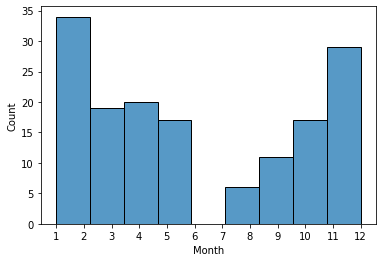

In [52]:
fig1=sns.histplot(data=df, x="Month")
plt.xticks(range(1,13))
plt.show()

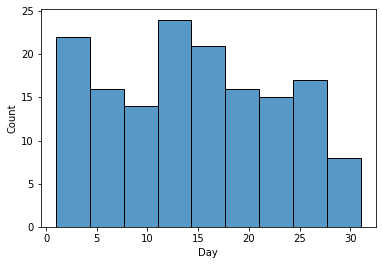

In [54]:
fig2=sns.histplot(df, x="Day")

<AxesSubplot:xlabel='imdb_rating', ylabel='us_viewers'>

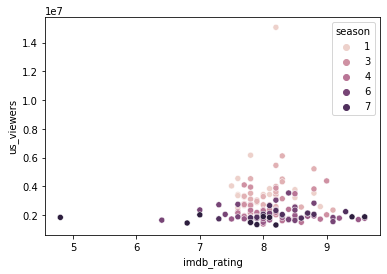

In [94]:
sns.scatterplot(x="imdb_rating", y="us_viewers", hue="season", data=df)

In [56]:
df["directed_by"].str.split(" & ", expand=True)

,0,1
0,Phil Lord,Christopher Miller
1,Craig Zisk,None
2,Julie Anne Robinson,None
3,Troy Miller,None
4,Jason Ensler,None
...,...,...
148,Maggie Carey,None
149,Thembi Banks,None
150,Beth McCarthy Miller,None
151,Linda Mendoza,None


In [80]:
directors=df.copy()
directors=pd.concat([directors, df["directed_by"].str.split(" & ", expand=True)], axis=1)
directors=directors.melt(id_vars=["title", "imdb_rating", "season"], value_vars=[0,1])
directors=directors[directors["value"].notna()]
directors

,title,imdb_rating,season,variable,value
0,Pilot,7.8,1,0,Phil Lord
1,The Tagger,7.5,1,0,Craig Zisk
2,The Slump,7.6,1,0,Julie Anne Robinson
3,M.E. Time,7.7,1,0,Troy Miller
4,The Vulture,8.0,1,0,Jason Ensler
...,...,...,...,...,...
149,Game of Boyles,8.1,8,0,Thembi Banks
150,Renewal,8.2,8,0,Beth McCarthy Miller
151,The Last Day Pt 1,9.4,8,0,Linda Mendoza
152,The Last Day Pt 2,9.6,8,0,Claire Scanlon


<AxesSubplot:xlabel='Count', ylabel='value'>

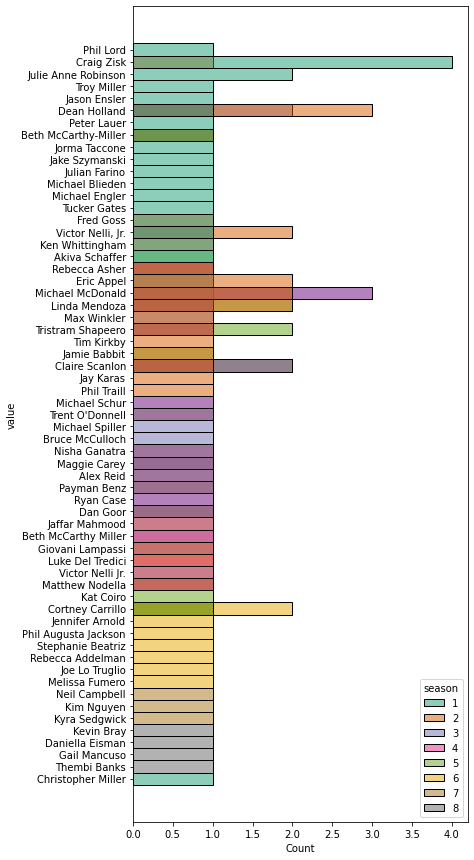

In [83]:
fig_dims = (6, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(directors, y="value", ax=ax, hue="season", palette="Dark2")

In [85]:
writers=df.copy()
writers=pd.concat([directors, df["written_by"].str.split(" & ", expand=True)], axis=1)
writers=writers.melt(id_vars=["title", "imdb_rating", "season"], value_vars=[0,1])
writers=writers[writers["value"].notna()]
writers

<ipython-input-85-3b988f8e05ef>:3: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



,title,imdb_rating,season,variable,value
0,Pilot,7.8,1,0,Dan Goor
1,The Tagger,7.5,1,0,Norm Hiscock
2,The Slump,7.6,1,0,Prentice Penny
3,M.E. Time,7.7,1,0,Gil Ozeri
4,The Vulture,8.0,1,0,Laura McCreary
...,...,...,...,...,...
301,PB&J,8.0,8,1,Jeff Topolski
302,The Set Up,6.8,8,1,Nick Perdue
303,Game of Boyles,8.1,8,1,Madeline Walter
304,Renewal,8.2,8,1,Beau Rawlins


<AxesSubplot:xlabel='Count', ylabel='value'>

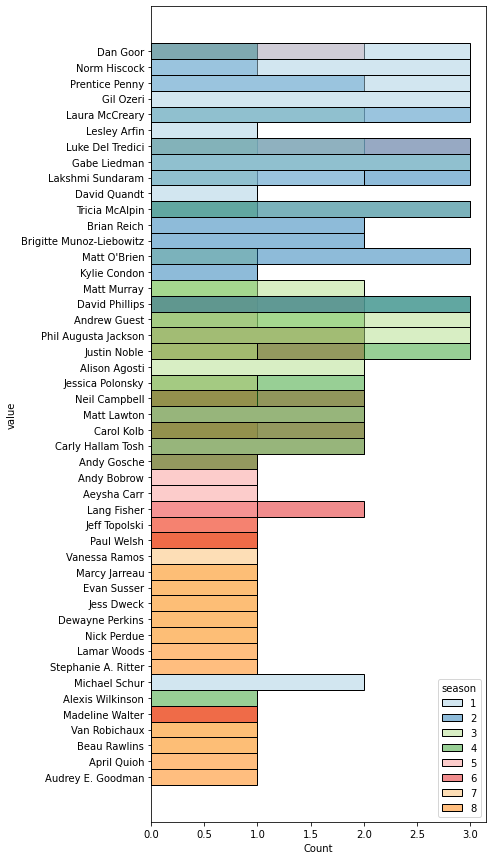

In [88]:
fig_dims = (6, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(writers, y="value", ax=ax, hue="season", palette="Paired")

<AxesSubplot:xlabel='imdb_rating', ylabel='value'>

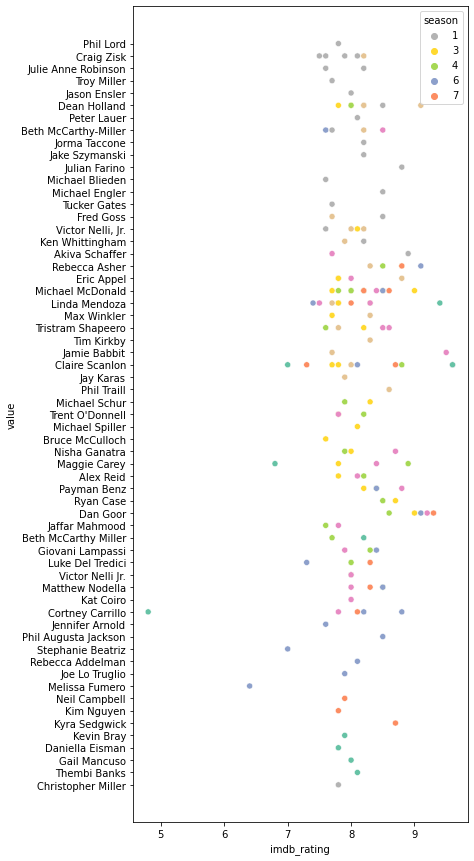

In [102]:
fig_dims = (6, 15)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(data=directors, x="imdb_rating", y="value", hue="season", ax=ax, palette="Set2_r")